# Creditworthiness Prediction
## CodeAlpha ML Internship
### Task 1: Credit Scoring Model
<hr>

# 1. Import Libraries

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# 2. Load and Inspect the Dataset

# Credit Risk Dataset Overview

The dataset consists of **32,581 rows** and **12 columns**. Below is the detailed structure of the dataset:

## Columns Overview

1. **`person_age`**
   - **Description**: Age of the person.
   - **Type**: Integer.

2. **`person_income`**
   - **Description**: Annual income of the person.
   - **Type**: Integer.

3. **`person_home_ownership`**
   - **Description**: Home ownership status.
   - **Type**: Categorical (e.g., `RENT`, `OWN`, `MORTGAGE`, etc.).

4. **`person_emp_length`**
   - **Description**: Length of employment.
   - **Type**: Float (some missing values present).

5. **`loan_intent`**
   - **Description**: Purpose of the loan.
   - **Type**: Categorical (e.g., `PERSONAL`, `EDUCATION`, `MEDICAL`, etc.).

6. **`loan_grade`**
   - **Description**: Grade assigned to the loan.
   - **Type**: Categorical.

7. **`loan_amnt`**
   - **Description**: Loan amount.
   - **Type**: Integer.

8. **`loan_int_rate`**
   - **Description**: Interest rate of the loan.
   - **Type**: Float (some missing values present).

9. **`loan_status`**
   - **Description**: Target variable representing loan repayment status.
   - **Values**:
     - `1`: Defaulted.
     - `0`: Fully paid.
   - **Type**: Integer.

10. **`loan_percent_income`**
    - **Description**: Loan amount as a percentage of income.
    - **Type**: Float.

11. **`cb_person_default_on_file`**
    - **Description**: Whether the person has defaulted before.
    - **Type**: Categorical (`Y`, `N`).

12. **`cb_person_cred_hist_length`**
    - **Description**: Length of credit history.
    - **Type**: Integer.

## Observations
- Missing values are present in **`person_emp_length`** and **`loan_int_rate`**.
- The target variable is **`loan_status`**, which indicates whether a loan was defaulted (`1`) or not (`0`).


In [12]:
# Load the dataset
data = pd.read_csv('credit_risk_dataset.csv')

In [13]:
# Basic dataset inspection
print(data.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [14]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


In [15]:
print(data.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [16]:
print(data.isnull().sum())  # Check for missing values

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64




# 3. Data Cleaning

In [18]:
# Handle missing values
data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

/tmp/ipykernel_29375/1488893347.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['person_emp_length'].fillna(data['person_emp_length'].median(), inplace=True)
/tmp/ipykernel_29375/1488893347.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [19]:
# Verify no missing values remain
print(data.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


# 4. Feature Engineering

In [20]:
# Encode categorical variables
label_encoder = LabelEncoder()
data['person_home_ownership'] = label_encoder.fit_transform(data['person_home_ownership'])
data['loan_intent'] = label_encoder.fit_transform(data['loan_intent'])
data['loan_grade'] = label_encoder.fit_transform(data['loan_grade'])
data['cb_person_default_on_file'] = label_encoder.fit_transform(data['cb_person_default_on_file'])

In [21]:
# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['person_age', 'person_income', 'loan_amnt', 
                       'loan_percent_income', 'cb_person_cred_hist_length', 
                       'person_emp_length', 'loan_int_rate']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# 5. Define Features and Target

In [22]:
# Define X (features) and y (target)
X = data.drop(columns=['loan_status'])
y = data['loan_status']

# 6. Train-Test Split

In [23]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (26064, 11)
Test set shape: (6517, 11)


# 7. Model Training

In [24]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# 8. Model Evaluation

In [25]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [26]:
# Classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517



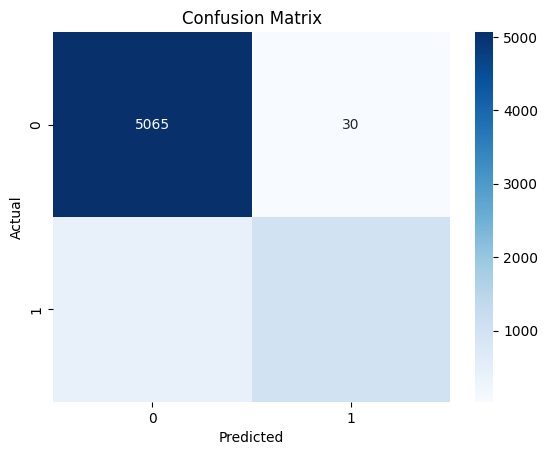

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

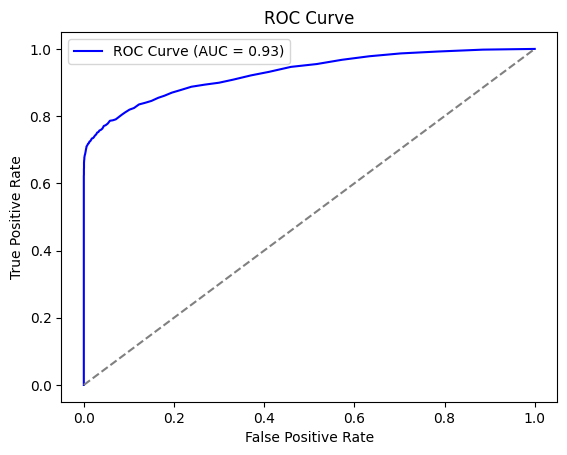

In [28]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# 9. Feature Importance

In [29]:
# Feature importance from the Random Forest model
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

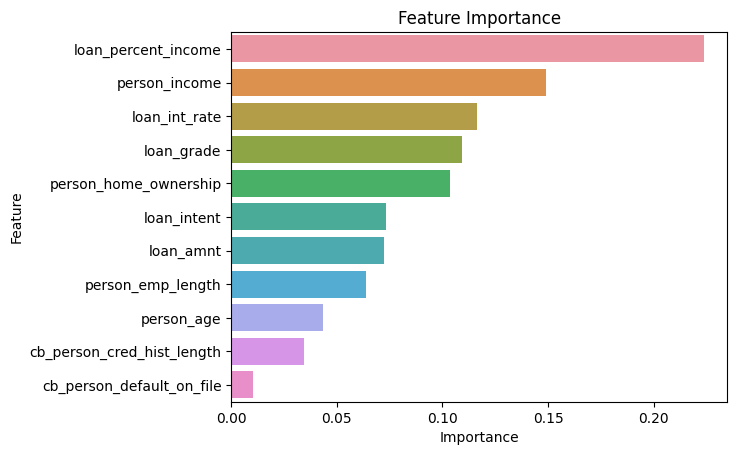

In [30]:
# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()

# 10. Save the Model

In [31]:
import joblib

# Save the trained model
joblib.dump(model, 'credit_scoring_model.pkl')

['credit_scoring_model.pkl']

<hr>

## Thank you!